<a href="https://colab.research.google.com/github/MingzheHu-Duke/Detecting-Retina-Damage-from-Speckle-Noise-Polluted-OCT-Retinal-Images/blob/master/CustomeVGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly

     |████████████████████████████████| 519.0MB 29kB/s 
     |████████████████████████████████| 460kB 31kB/s 
     |████████████████████████████████| 3.0MB 41.5MB/s 


In [2]:
import tensorflow as tf
print("Tensor Flow Verion: " + tf.__version__)
tf.test.gpu_device_name()

Tensor Flow Verion: 2.2.0-dev20200420


'/device:GPU:0'

In [4]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"mingzhehu","key":"92235045fd85f95ca75fb5844cc352ff"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /content/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/kermany2018 -p /content

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
100% 10.8G/10.8G [04:17<00:00, 36.8MB/s]
100% 10.8G/10.8G [04:17<00:00, 45.2MB/s]


In [0]:
!unzip \*.zip

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import numpy as np
import os
import cv2
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
%matplotlib inline

In [0]:
num_classes = 4
img_rows, img_cols = 224, 224
batch_size = 16

In [0]:
train_data_dir = 'OCT2017 /train'
validation_data_dir = 'OCT2017 /test'

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 83484 images belonging to 4 classes.


In [17]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 968 images belonging to 4 classes.


# **CustomeVGG Model**

In [0]:
def vgg():
    model = Sequential([

    # 1st CONV-ReLU Layer
    Conv2D(64, (3, 3), activation="relu",padding = 'same', input_shape = (img_rows, img_cols, 3)),
    BatchNormalization(),

    # 2nd CONV-ReLU Layer
    Conv2D(64, (3, 3), activation="relu", padding = "same"),
    BatchNormalization(),

    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # 3rd set of CONV-ReLU Layers
    Conv2D(128, (3, 3), activation="relu",padding="same"),
    BatchNormalization(),

    # 4th Set of CONV-ReLU Layers
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),

    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # 5th Set of CONV-ReLU Layers
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),

    # 6th Set of CONV-ReLU Layers
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),

    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
     # 7th Set of CONV-ReLU Layers
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),

    # 8th Set of CONV-ReLU Layers
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    
    # 9th Set of CONV-ReLU Layers
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),

    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # 10th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
        
    # 11th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
        
    # 12th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
        
    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
    # 13th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
        
    # 14th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
        
    # 15th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
        
    # Max Pooling with Dropout 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
    # 16th Set of CONV-ReLU Layers
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    
    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Final Dense Layer
    Dense(num_classes,activation="softmax"),
    ])
    return model

In [21]:
model = vgg()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

# **Train CustomeVGG Model**

In [0]:
checkpoint_path = "train_ckpt/cp-{epoch:04d}.ckpt"

In [0]:
checkpoint  = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.00001
)

callbacks=[earlystop, checkpoint, reduce_lr]

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

In [0]:
nb_train_samples = 83484
nb_validation_samples = 968
epochs = 10

In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
5217/5217 [==============================] - ETA: 0s - loss: 0.5805 - accuracy: 0.7972
Epoch 00001: val_loss improved from inf to 0.19783, saving model to train_ckpt/cp-0001.ckpt
INFO:tensorflow:Assets written to: train_ckpt/cp-0001.ckpt/assets
5217/5217 [==============================] - 1157s 222ms/step - loss: 0.5805 - accuracy: 0.7972 - val_loss: 0.1978 - val_accuracy: 0.9187
Epoch 2/10
5217/5217 [==============================] - ETA: 0s - loss: 0.3037 - accuracy: 0.9042
Epoch 00002: val_loss did not improve from 0.19783
5217/5217 [==============================] - 1058s 203ms/step - loss: 0.3037 - accuracy: 0.9042 - val_loss: 0.2374 - val_accuracy: 0.9094
Epoch 3/10
5217/5217 [==============================] - ETA: 0s - loss: 0.2441 - accuracy: 0.9229
Epoch 00003: val_loss improved from 0.19783 to 0.14653, saving model to train_ckpt/cp-0003.ckpt
INFO:tensorflow:Assets written to: train_ckpt/cp-

In [28]:
scores = model.evaluate_generator(validation_generator,steps=nb_validation_samples // batch_size+1, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
61/61 [==============================] - 3s 49ms/step - loss: 0.0320 - accuracy: 0.9897

Test result: 98.967 loss: 0.032


In [27]:
!mkdir -p saved_model
model.save('saved_model/CustomedVGG_model') 

INFO:tensorflow:Assets written to: saved_model/CustomedVGG_model/assets


**Loading saved classifer**

In [0]:
model = tf.keras.models.load_model('saved_model/CustomedVGG_model')

**Training and validation history**

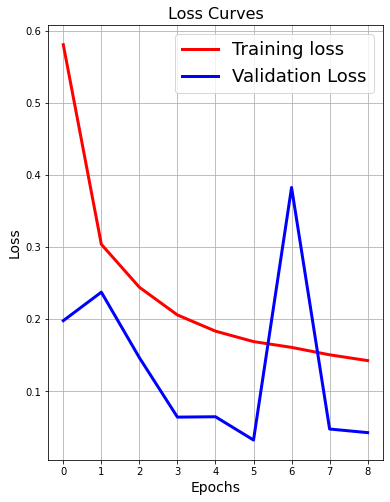

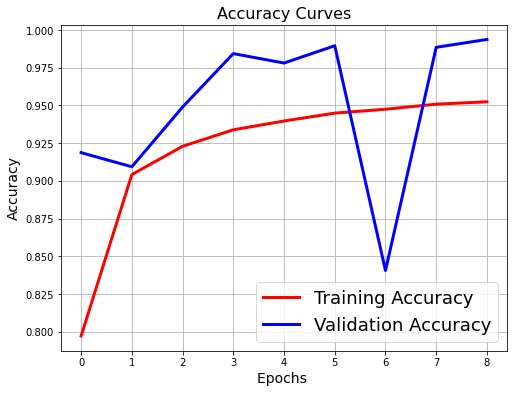

In [30]:
#Loss Curves
plt.figure(figsize=[6, 8])
plt.plot(history.history["loss"], "r", linewidth=3.0)
plt.plot(history.history["val_loss"], "b", linewidth=3.0)
plt.legend(["Training loss", "Validation Loss"], fontsize=18)
plt.grid()
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Loss Curves", fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy Curves',fontsize=16);

**Test result**

In [31]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 968 images belonging to 4 classes.


In [0]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()} 
classes = list(class_labels.values())

In [33]:
y_pred = model.predict_generator(validation_generator, nb_validation_samples//batch_size + 1)
y_pred_label = np.argmax(y_pred, axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.


Confusion Matrix
[[233   8   1   0]
 [  1 241   0   0]
 [  0   0 242   0]
 [  0   0   0 242]]


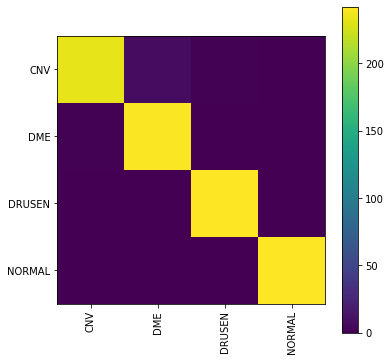

In [34]:
print("Confusion Matrix")
print(confusion_matrix(validation_generator.classes, y_pred_label))

plt.figure(figsize=(6,6))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred_label)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [35]:
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred_label, target_names=classes))

Classification Report
              precision    recall  f1-score   support

         CNV       1.00      0.96      0.98       242
         DME       0.97      1.00      0.98       242
      DRUSEN       1.00      1.00      1.00       242
      NORMAL       1.00      1.00      1.00       242

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968



**Testing on Images**

In [0]:
import os
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow

In [0]:
import tensorflow.keras.preprocessing.image as preimg
import cv2

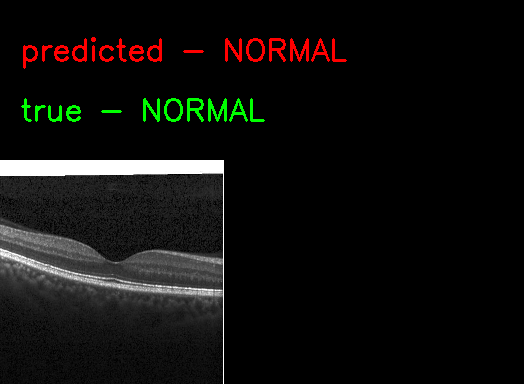

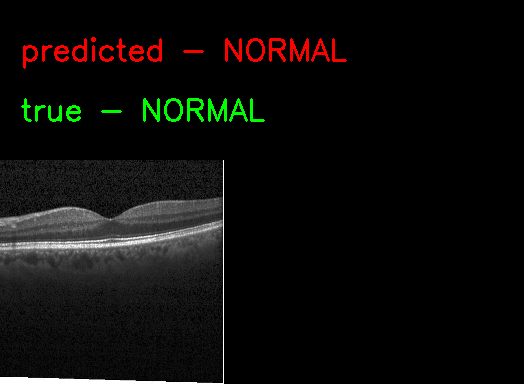

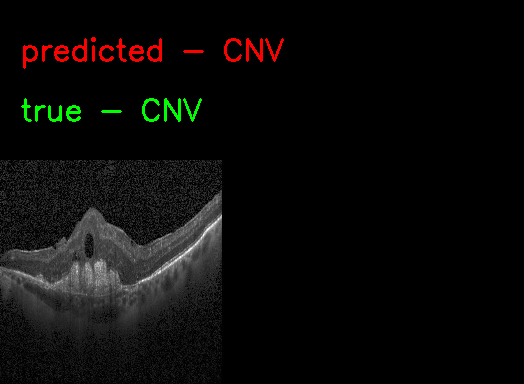

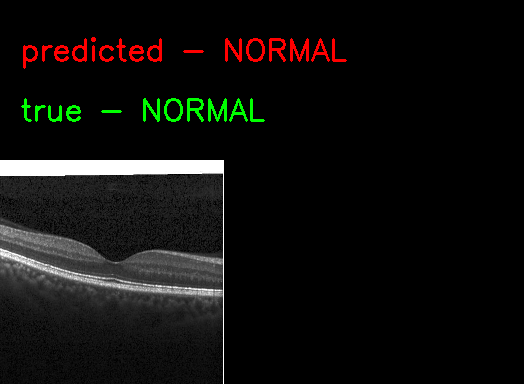

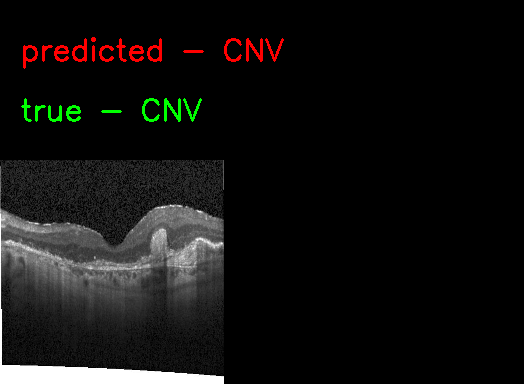

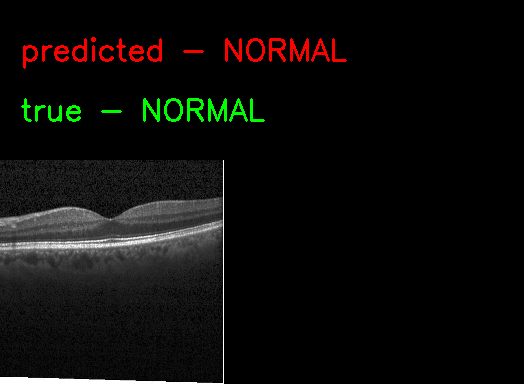

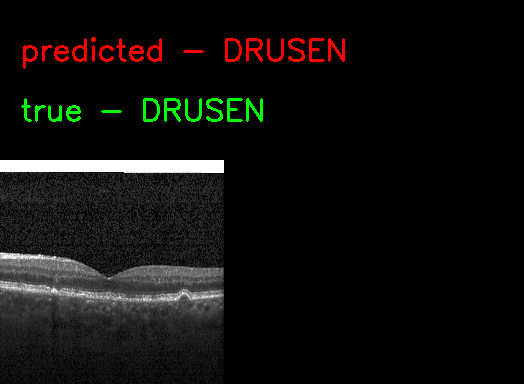

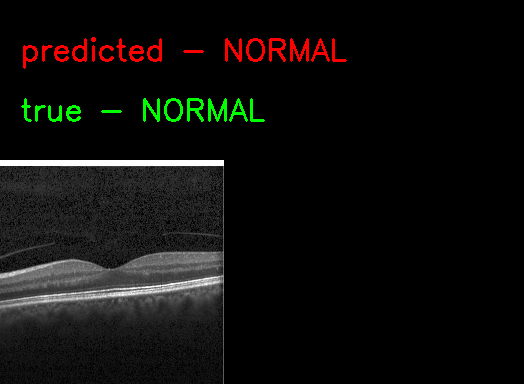

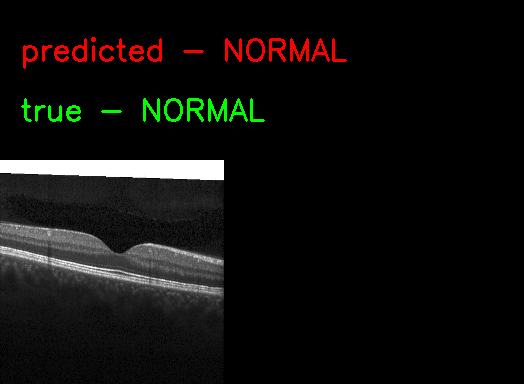

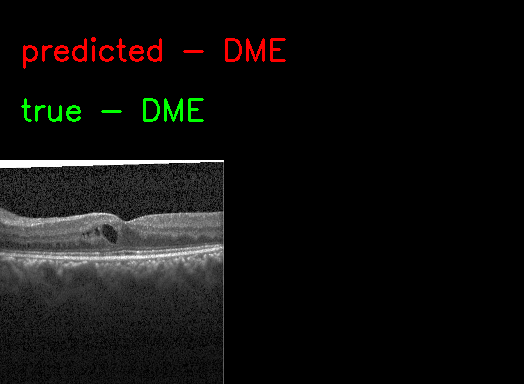

In [38]:
def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predicted - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return preimg.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 224, 224

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = 'OCT2017 /val/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = preimg.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    predict = model.predict(images, batch_size = 10)
    classes = np.argmax(predict, axis=1)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, (img_width, img_height), fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

**Plot the model structure**

In [0]:
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg

(-0.5, 648.5, 5163.5, -0.5)

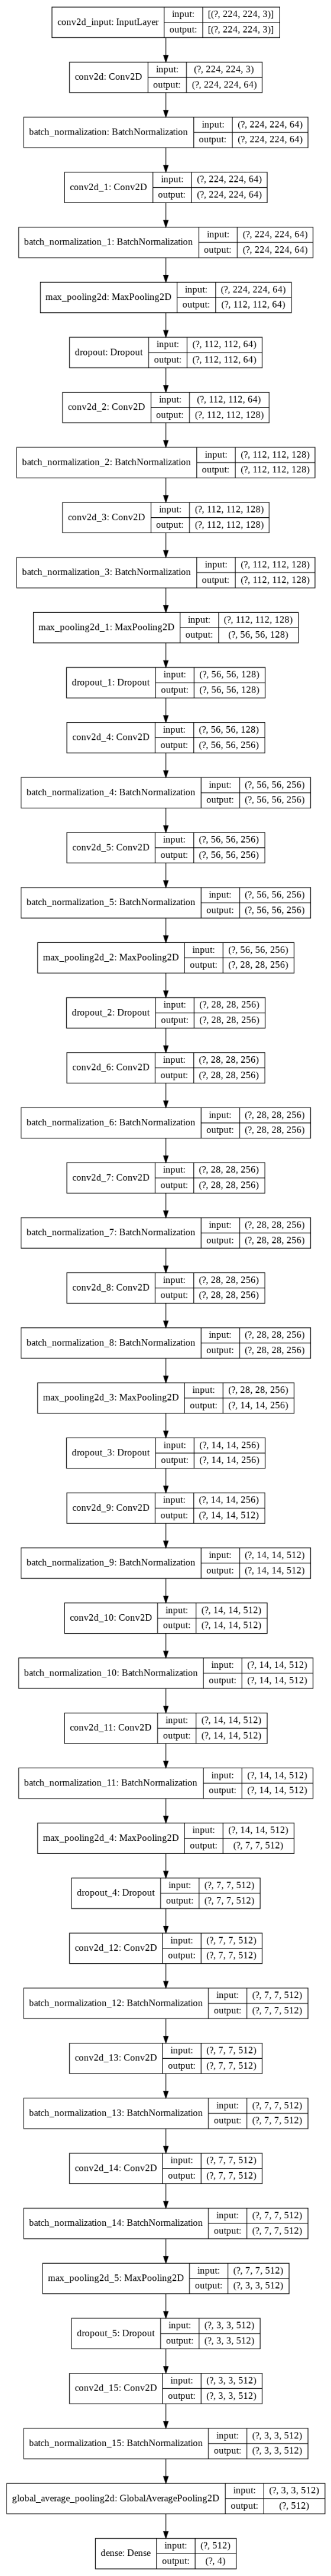

In [43]:
plot_model(model, to_file="model_plot_retinal_MobileNet.png", show_shapes=True, show_layer_names=True)
img = mpimg.imread('model_plot_retinal_MobileNet.png')
plt.figure(figsize=(45,80))
plt.imshow(img)
plt.axis("off")